# DarkELF Daily Modulation in Multiphonons

Written by Connor Stratman, September 2024

In [73]:
%matplotlib inline

import sys, os
import numpy as np
from numpy import pi
import matplotlib.pyplot as plt
import matplotlib.ticker
from matplotlib import rc, rcParams
import matplotlib.cm as cm
from mpl_toolkits.axes_grid1 import make_axes_locatable
import time
import pandas
from scipy import interpolate
import seaborn as sns
from matplotlib.animation import PillowWriter

# Make use of TeX\ufeff
rc('text',usetex=True)
# Change all fonts to 'Computer Modern'
rc('font',**{'size':14, 'family':'serif','serif':['Times New Roman']})
rc('xtick.major', size=5, pad=7)
rc('xtick', labelsize=15)
rc('ytick.major', size=5, pad=7)
rc('ytick', labelsize=15)

# this needs to point to the folder where darkelf.py is stored
work_dir = os.getcwd()
sys.path.append(work_dir+"/..")
plotdir=work_dir+"/plots/"

# load the package
from darkelf import darkelf, targets


In [74]:
al2o3 = darkelf(target='Al2O3')
si = darkelf(target = 'Si')
sio2 = darkelf(target = 'SiO2')
sic = darkelf(target='SiC')

 .... Loading files for Al2O3
Loaded Al2O3_mermin.dat for epsilon in electron regime
electronic ELF taken or calculated from Y. Sun, H. Xu, B. Da, S.-f. Mao and Z.-j. Ding, Calculations of Energy-Loss Function for 26 Materials, Chinese Journal of Chemical Physics9(2016) 663.
phonon ELF taken or calculated from  F. Gervais and B. Piriou, Anharmonicity in several-polar-mode crystals:  adjusting phonon self-energy of LO and TO modes in Al2O3 and TiO2 to fit infrared reflectivity,Journal of Physics C Solid State Physics 7 (1974) 2374 and M. Schubert, T.E. Tiwald and C.M. Herzinger, Infrared dielectric anisotropy and phonon modes of sapphire, Phys. Rev. B61(2000) 8187
Loaded Al2O3_epsphonon_o.dat for epsilon in phonon regime
Warning! Atomic Migdal calculation not present
Warning! Momentum dependent Zion for Migdal calculation not loaded. Using Z - number of valence electrons.
Loaded /Users/ConnorsComputer/Documents/GitHub/DarkELF/examples/../darkelf/../data/Al2O3/Al_pDoS.dat for partial den

/Users/ConnorsComputer/Documents/GitHub/DarkELF/examples/../darkelf/epsilon.py:44: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data.fillna(inplace=True,method='bfill')# fill in some NaN values


Loaded /Users/ConnorsComputer/Documents/GitHub/DarkELF/examples/../darkelf/../data/Al2O3/Al2O3_pDoS_anisotropic.dat for partial densities of states
Al2O3_pDoS_anisotropic.dat
/Users/ConnorsComputer/Documents/GitHub/DarkELF/examples/../darkelf/../data/Al2O3/Al2O3_Fn.npy
Loaded Al2O3_Fn_anisotropic.npy for Fn(omega)
 .... Loading files for Si
Loaded Si_gpaw_withLFE.dat for epsilon in electron regime
electronic ELF taken or calculated from J. Enkovaara et al.,Electronic structure calculations with GPAW: a real-space implementation of the projector augmented-wave method,Journal of Physics:Condensed Matter22(2010) 253202.


/Users/ConnorsComputer/Documents/GitHub/DarkELF/examples/../darkelf/epsilon.py:44: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data.fillna(inplace=True,method='bfill')# fill in some NaN values


phonon ELF taken or calculated from M. Ikezawa and M. Ishigame, Far-Infrared AbsorptionDue to the Two-Phonon Difference Process in Si, Journal of the Physical Society of Japan 50(1981) 3734.
Loaded Si_epsphonon_data6K.dat for epsilon in phonon regime
Zion(k) for Migdal calculation taken or calculated from: P. J. Brown, A. G. Fox, E. N. Maslen, M. A. OKeefe,and B. T. M. Willis, “Intensity of diffracted intensities,” in International Tables for Crystallography (American Cancer Society, 2006) Chap. 6.1, pp. 554–595, https://onlinelibrary.wiley.com/doi/pdf/10.1107/97809553602060000
Loaded /Users/ConnorsComputer/Documents/GitHub/DarkELF/examples/../darkelf/../data/Si/Si_pDoS.dat for partial densities of states
Loaded /Users/ConnorsComputer/Documents/GitHub/DarkELF/examples/../darkelf/../data/Si/Si_Fn.dat for Fn(omega)
Loaded /Users/ConnorsComputer/Documents/GitHub/DarkELF/examples/../darkelf/../data/Si/Si_pDoS_anisotropic.dat for partial densities of states
Si_pDoS_anisotropic.dat
/Users/Co

/Users/ConnorsComputer/Documents/GitHub/DarkELF/examples/../darkelf/epsilon.py:44: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data.fillna(inplace=True,method='bfill')# fill in some NaN values


Loaded /Users/ConnorsComputer/Documents/GitHub/DarkELF/examples/../darkelf/../data/SiO2/SiO2_pDoS_anisotropic.dat for partial densities of states
SiO2_pDoS_anisotropic.dat
/Users/ConnorsComputer/Documents/GitHub/DarkELF/examples/../darkelf/../data/SiO2/SiO2_Fn.npy
Warning! SiO2_Fn_anisotropic.npy does not exist! Need to calculate Fn(omega) from DoS. Use the function 'F_n_d_precompute' to produce these files 
 .... Loading files for SiC
Warning! Epsilon grid in electron regime does not exist.
phonon ELF taken or calculated from S.M. Griffin, Y. Hochberg, K. Inzani, N. Kurinsky,T. Lin and T.C. Yu,SiC Detectors for Sub-GeV DarkMatter,2008.08560. and  H. Mutschke, A.C. Andersen, D. Clement, T. Henning and G. Peiter, Infrared properties of sic particles, Astron. Astrophys. 345 (1999) 187[astro-ph/9903031]
Loaded SiC_epsphonon_3C.dat for epsilon in phonon regime
Warning! Atomic Migdal calculation not present
Warning! Momentum dependent Zion for Migdal calculation not loaded. Using Z - number

**First, one must precompute the F_n_d files for each atom. (It should only take a few minutes for each crystal, but the files are rather large so they are not uploaded to the github.) This only needs to be done once on your local machine. Remember to reload the class after running this.**

In [92]:
#al2o3.F_n_d_precompute_anisotropic(phonons=20)
#si.F_n_d_precompute_anisotropic()
#sio2.F_n_d_precompute_anisotropic()
#sic.F_n_d_precompute_anisotropic(phonons=20)

/Users/ConnorsComputer/Documents/GitHub/DarkELF/examples/../darkelf/../data/SiC/SiC_Fn.npy


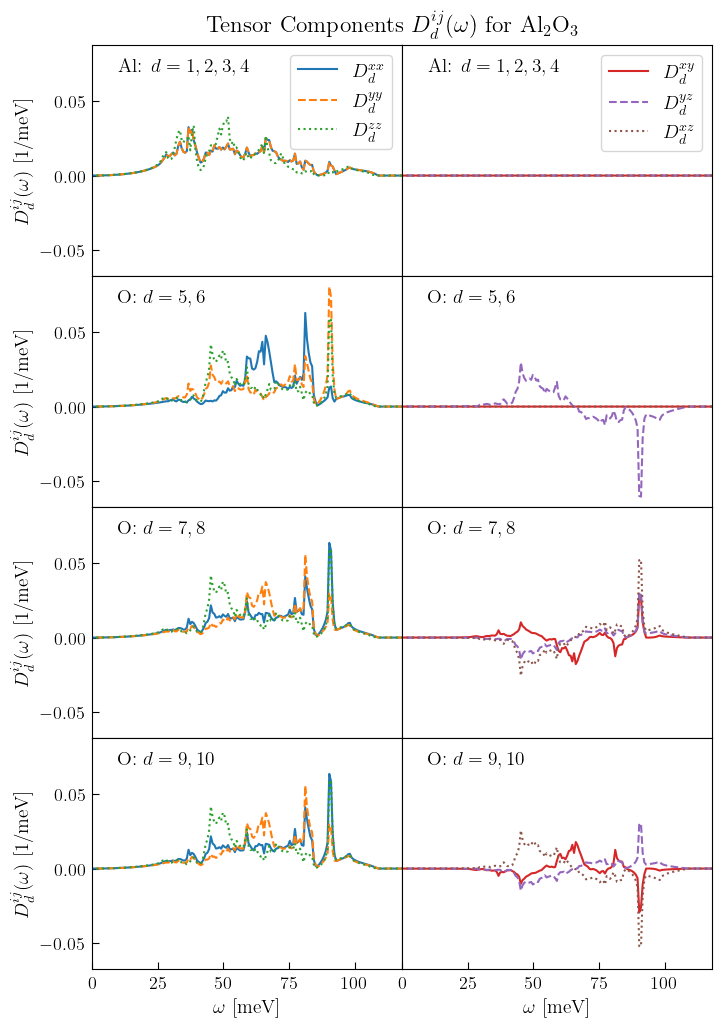

In [75]:
# Plotting all components of the tensor.
# Let's first try one column, with each graph containing all tensor components for that atom,
# not including repeated atoms.

colors = sns.color_palette()

fig = plt.figure(figsize=(8,12))
gs = fig.add_gridspec(4,2,hspace=0,wspace=0)
ax = gs.subplots(sharey=True)

atoms_to_plot = [0,1,2,3]
title = ['Al (d=1,2,3,4)','O (d=5,6)','O (d=7,8)','O (d=9,10)']

for i,d in enumerate(atoms_to_plot):
    ax[(i,0)].plot(al2o3.phonon_DoS_anisotropic[0]*1000,al2o3.D_d_ij_tensor[d][0][0]/1000,color=colors[0],label=r'$D_d^{xx}$')
    ax[(i,0)].plot(al2o3.phonon_DoS_anisotropic[0]*1000,al2o3.D_d_ij_tensor[d][1][1]/1000,color=colors[1],label=r'$D_d^{yy}$',linestyle='dashed')
    ax[(i,0)].plot(al2o3.phonon_DoS_anisotropic[0]*1000,al2o3.D_d_ij_tensor[d][2][2]/1000,color=colors[2],label=r'$D_d^{zz}$',linestyle='dotted')

    ax[(i,1)].plot(al2o3.phonon_DoS_anisotropic[0]*1000,al2o3.D_d_ij_tensor[d][0][1]/1000,color=colors[3],label=r'$D_d^{xy}$')
    ax[(i,1)].plot(al2o3.phonon_DoS_anisotropic[0]*1000,al2o3.D_d_ij_tensor[d][1][2]/1000,color=colors[4],label=r'$D_d^{yz}$',linestyle='dashed')
    ax[(i,1)].plot(al2o3.phonon_DoS_anisotropic[0]*1000,al2o3.D_d_ij_tensor[d][0][2]/1000,color=colors[5],label=r'$D_d^{xz}$',linestyle='dotted')

    ax[(0,0)].legend(fontsize=14,loc='upper right')
    ax[(0,1)].legend(fontsize=14,loc='upper right')

    ax[(i,0)].label_outer(True)
    ax[(i,1)].label_outer(True)

    ax[(i,0)].annotate(f'{title[i]}',(40,75),fontsize=13)
    ax[(i,1)].annotate(f'{title[i]}',(40,75),fontsize=13)

    ax[(i,0)].set_xlim(0,118)
    ax[(i,1)].set_xlim(0,118)

    ax[(i,0)].set_xlabel(r'$\omega$ [meV]')
    ax[(i,1)].set_xlabel(r'$\omega$ [meV]')
    ax[(i,0)].set_ylabel(r'$D_d^{ij}(\omega)$ [1/meV]')

    ax[(i,0)].tick_params(axis="both",which="major",labelsize=13,direction="in",pad=5)
    ax[(i,1)].tick_params(axis="both",which="major",labelsize=13,direction="in",pad=5)

fig.suptitle(r'Tensor Components $D_d^{ij}(\omega)$ for Al$_2$O$_3$',y=0.91);

ax[(0,0)].annotate(f'Al: $d=1,2,3,4$',(10,0.07),fontsize=14);
ax[(0,1)].annotate(f'Al: $d=1,2,3,4$',(10,0.07),fontsize=14);
ax[(1,0)].annotate(f'O: $d=5,6$',(10,0.07),fontsize=14);
ax[(1,1)].annotate(f'O: $d=5,6$',(10,0.07),fontsize=14);
ax[(2,0)].annotate(f'O: $d=7,8$',(10,0.07),fontsize=14);
ax[(2,1)].annotate(f'O: $d=7,8$',(10,0.07),fontsize=14);
ax[(3,0)].annotate(f'O: $d=9,10$',(10,0.07),fontsize=14);
ax[(3,1)].annotate(f'O: $d=9,10$',(10,0.07),fontsize=14);

#fig.savefig('tensor_components_Al2O3.png',bbox_inches='tight')

0.05653190612792969 seconds


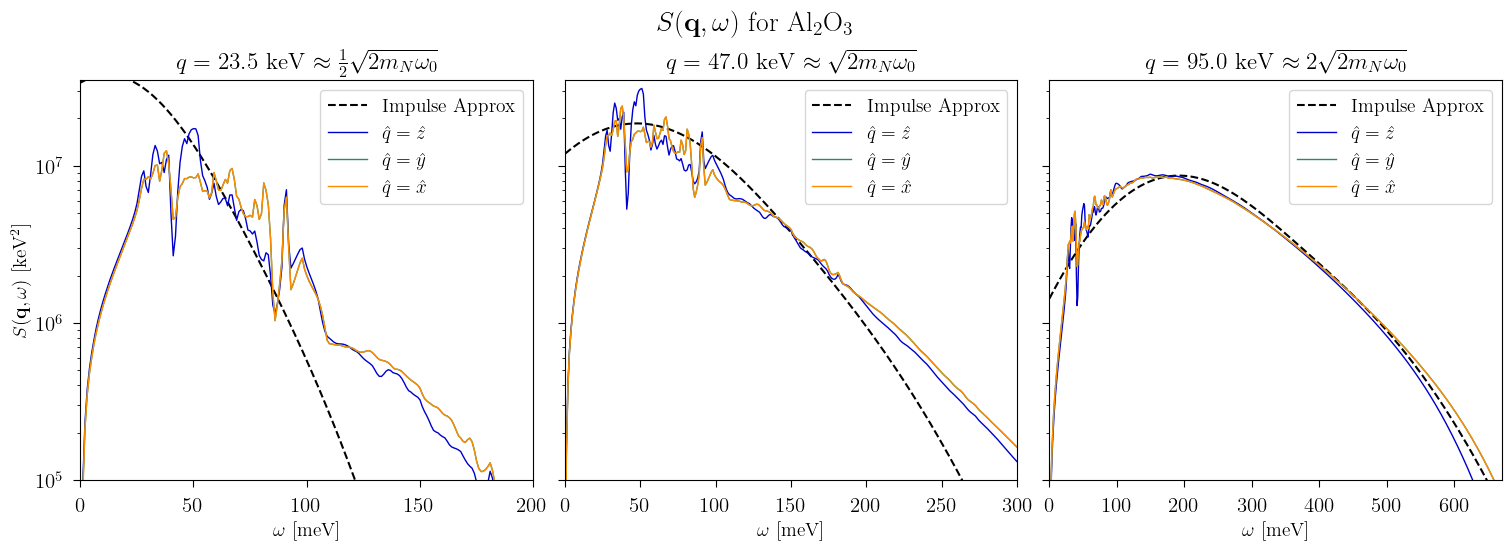

In [76]:
fig,ax = plt.subplots(nrows=1,ncols=3,figsize=(15,5),layout='constrained',sharey=True)
q_array = np.array([23.5,47,95])*1.0e3 #different q values to test below
omega = np.linspace(0.0,1000e-3,1000)
thetas = np.array([0,np.pi/2,np.pi/2])

fig.suptitle(f'$S(\mathbf{{q}},\\omega)$ for Al$_2$O$_3$',y=1.07,fontsize=20)

start = time.time()
S_q_omega_Al2O3 = al2o3.structure_factor_anisotropic(q_array,thetas,[np.pi/2,0],omega,1,10)
impulse_approx_Al2O3 = al2o3.impulse_approximation_anisotropic(q_array,omega)
end = time.time()
print(f'{end-start} seconds')

labels = [r'$\hat q = \hat z$',r'$\hat q = \hat y$',r'$\hat q = \hat x$']
colors = ['mediumblue','seagreen','darkorange']
ax[0].plot(omega*1000,impulse_approx_Al2O3[0]/1e6,label='Impulse Approx',color='black',linestyle='dashed')
ax[1].plot(omega*1000,impulse_approx_Al2O3[1]/1e6,label='Impulse Approx',color='black',linestyle='dashed')
ax[2].plot(omega*1000,impulse_approx_Al2O3[2]/1e6,label='Impulse Approx',color='black',linestyle='dashed')

for k,th in enumerate(thetas):
    for i,q in enumerate(q_array):
        ax[i].plot(omega*1000,S_q_omega_Al2O3[i][k][int(np.floor(k/2))]/1.0e6,\
                   label=labels[k],\
                    linewidth=1,color = colors[k])
        #ax[i].set_xlim(0,600)
        #ax[i].set_xlim(450,800)
        #ax[i].set_ylim(0,2.4e7)
        ax[i].set_ylim(1e5,3.5e7)
        ax[i].set_yscale('log')
        ax[i].legend();
        ax[i].set_xlabel(r'$\omega$ [meV]')

#ax[2].set_ylim(0,1e6)
ax[0].set_ylabel(r'$S(\mathbf{q},\omega)$ [keV$^2$]');

ax[0].set_title(f'$q=$ {np.round(q_array[0]/1000,1)} keV $\\approx \\frac{{1}}{{2}} \\sqrt{{2 m_N \omega_0}}$',y=1.01);
ax[1].set_title(f'$q=$ {np.round(q_array[1]/1000,1)} keV $\\approx \\sqrt{{2 m_N \omega_0}}$',y=1.01);
ax[2].set_title(f'$q=$ {np.round(q_array[2]/1000,1)} keV $\\approx 2 \\sqrt{{2 m_N \omega_0}}$',y=1.01);
ax[0].set_xlim(0,200)
ax[1].set_xlim(0,300)
ax[2].set_xlim(0,670);
#fig.savefig('Structure_factor_Al2O3_omega_fixeddirection_log.pdf',bbox_inches='tight')

In [77]:
al2o3.update_params(mX = 10e6,mediator='massive')
omega = np.array([50,80,500])*1e-3
time_array = np.arange(0,25)
dR_domega_time_vals = np.array([al2o3._dR_domega_anisotropic(omega,t) for t in time_array]).T

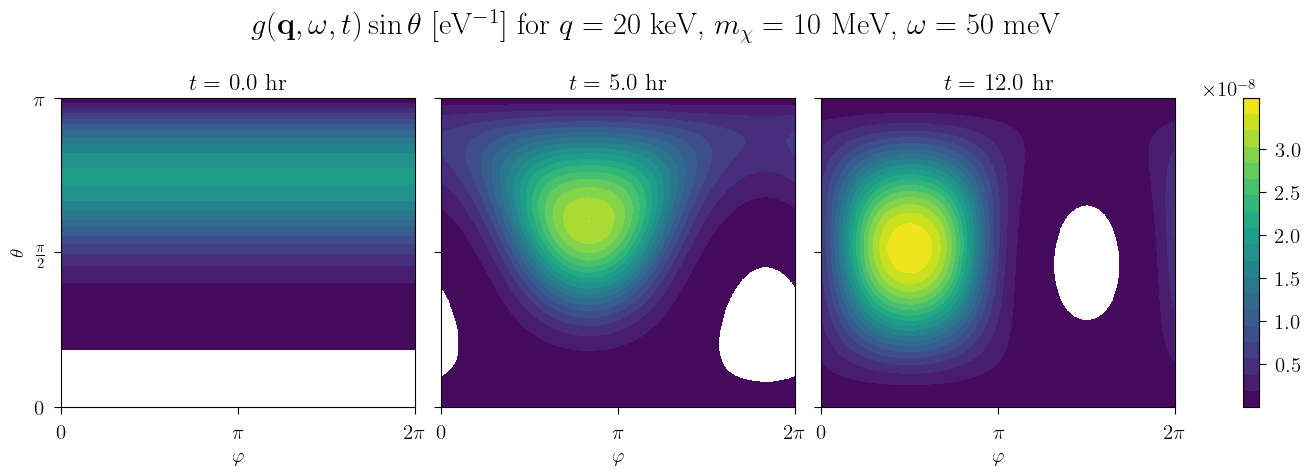

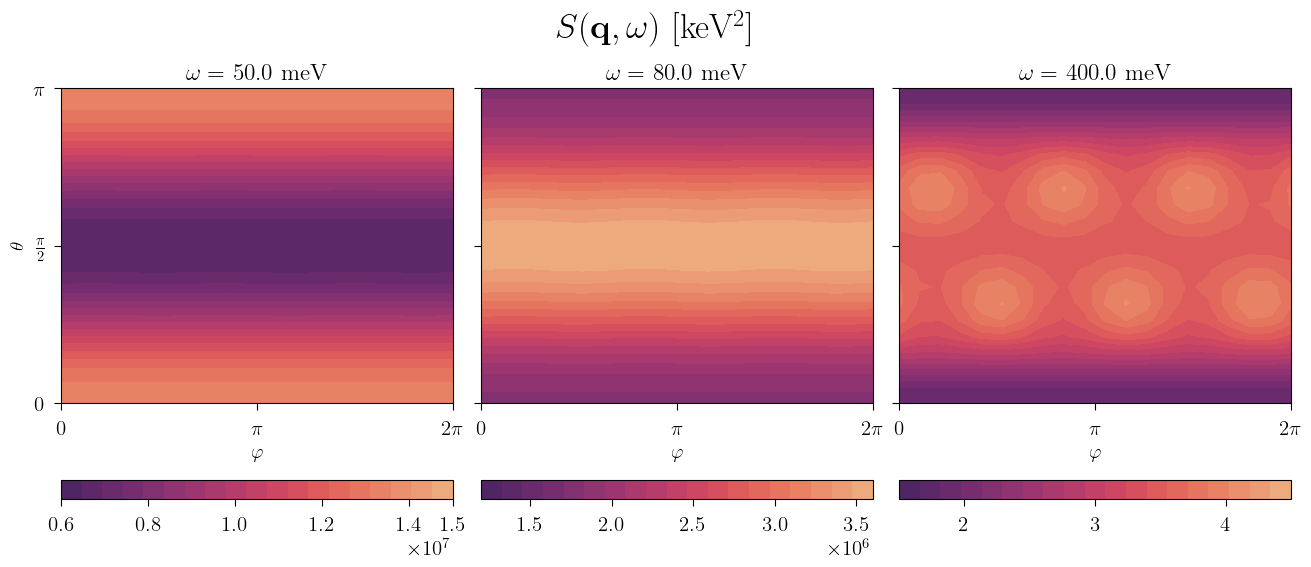

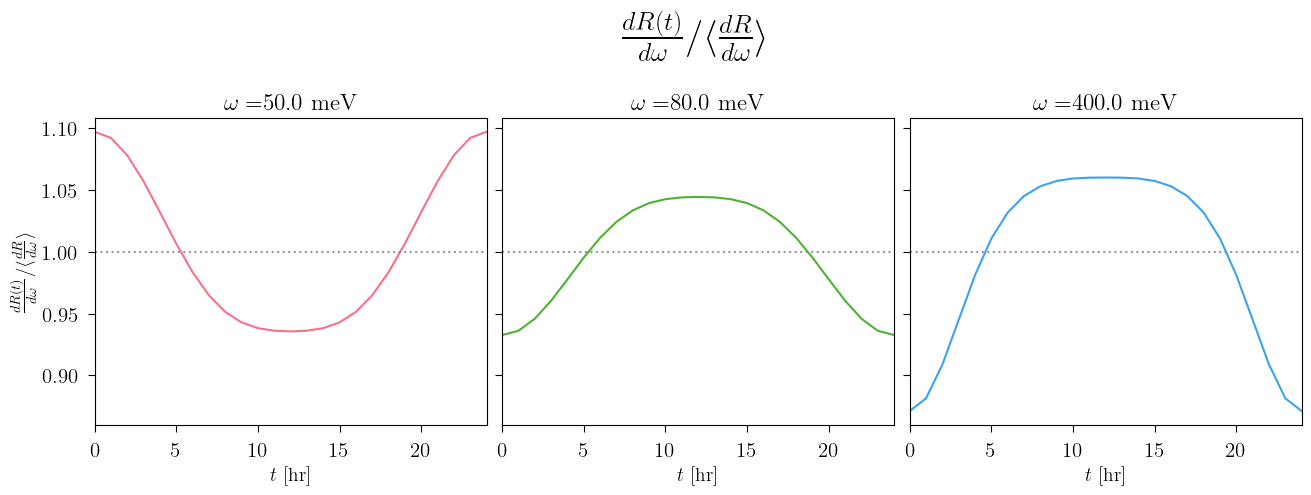

In [78]:
al2o3.update_params(mX = 10e6,mediator='massive')
test_q = np.array([20e3,23.5e3,15.e3,10.e3]) #test 20 keV. Might change slightly....
theta_vals = np.linspace(0,np.pi,400)
phi_vals = np.linspace(0,2*np.pi,400)
time_vals = np.array([0.,5.0,12.])
test_omega = np.array([50.e-3]) #omega doesn't really change g, so just pick 100 meV

kinematic_function_vals_Al2O3 = np.array([np.einsum('qtpw,t->qtpw',al2o3.kinematic_function_vector(test_q,theta_vals,phi_vals,test_omega,t),np.sin(theta_vals)) for t in time_vals])
# indexed time, q, theta, phi, omega

fig,ax = plt.subplots(ncols=3,nrows=1,figsize=(13,4),sharey=True,layout='constrained')

levels = np.linspace(1e-20,3.6e-8,20)
color = sns.color_palette("viridis", as_cmap=True)

C0 = ax[0].contourf(phi_vals,theta_vals,[[kinematic_function_vals_Al2O3[0][0][t][p][0]/1.0e6 \
                    for p in range(len(phi_vals))] for t in range(len(theta_vals))],\
                        levels,norm='linear',cmap=color,antialiased=False);
ax[0].set_xlabel(r'$\varphi$');
ax[0].set_ylabel(r'$\theta$');
ax[0].set_xticks([0,np.pi,2*np.pi])
ax[0].set_xticklabels(['0',r'$\pi$',r'$2 \pi$'])
ax[0].set_yticks([0,np.pi/2,np.pi])
ax[0].set_yticklabels([r'$0$',r'$\frac{\pi}{2}$',r'$\pi$'])
ax[0].set_title(f'$t =$ {time_vals[0]} hr')

C1 = ax[1].contourf(phi_vals,theta_vals,[[kinematic_function_vals_Al2O3[1][0][t][p][0]/1.0e6 \
                    for p in range(len(phi_vals))] for t in range(len(theta_vals))],\
                        levels,norm='linear',cmap=color);
ax[1].set_xlabel(r'$\varphi$');
ax[1].set_xticks([0,np.pi,2*np.pi])
ax[1].set_xticklabels(['0',r'$\pi$',r'$2 \pi$'])
ax[1].set_title(f'$t =$ {time_vals[1]} hr')

C2 = ax[2].contourf(phi_vals,theta_vals,[[kinematic_function_vals_Al2O3[2][0][t][p][0]/1.0e6 \
                    for p in range(len(phi_vals))] for t in range(len(theta_vals))],\
                        levels,norm='linear',cmap=color);
ax[2].set_xlabel(r'$\varphi$');
ax[2].set_xticks([0,np.pi,2*np.pi])
ax[2].set_xticklabels([r'$0$',r'$\pi$',r'$2 \pi$'])
ax[2].set_title(f'$t =$ {time_vals[2]} hr')

manual_ticks = np.array([5,10.,15,20.,25,30.])*1.e-9

fig.suptitle(r'$g(\mathbf{q},\omega,t) \sin{\theta}$ [eV$^{-1}$] for $q =$ 20 keV, $m_{\chi} =$ 10 MeV, $\omega = $ 50 meV',y=1.15,fontsize=22);

cbar = fig.colorbar(C2,ticks=manual_ticks)
#fig.savefig('kinematic_and_structure_factor_anisotropy1.pdf',bbox_inches='tight')

##### -----------------------------------------------------

fig,ax = plt.subplots(ncols=3,nrows=1,figsize=(13,5),sharey=True,layout='constrained')

q = [20e3]
W = [50,80,400]
theta_grid = np.linspace(0,np.pi,20)
phi_grid = np.linspace(0,2*np.pi,20)
omega_array = np.arange(0,501)*1e-3

levels0 = np.linspace(0.6e7,1.5e7,20)
levels1 = np.linspace(1.2e6,3.6e6,20)
levels2 = np.linspace(1.5,4.5,20)
color = sns.color_palette("flare_r", as_cmap=True)

structure_factor_vals = al2o3.structure_factor_anisotropic(q,theta_grid,phi_grid,omega_array,1,10)

B0 = ax[0].contourf(phi_grid,theta_grid,[[structure_factor_vals[0][t][p][W[0]]/1.0e6 \
                    for p in range(len(phi_grid))] for t in range(len(theta_grid))],\
                        levels0,norm='linear',cmap=color);
ax[0].set_xlabel(r'$\varphi$');
ax[0].set_ylabel(r'$\theta$');
ax[0].set_xticks([0,np.pi,2*np.pi])
ax[0].set_xticklabels(['0',r'$\pi$',r'$2 \pi$'])
ax[0].set_yticks([0,np.pi/2,np.pi])
ax[0].set_yticklabels([r'$0$',r'$\frac{\pi}{2}$',r'$\pi$'])

B1 = ax[1].contourf(phi_grid,theta_grid,[[structure_factor_vals[0][t][p][W[1]]/1.0e6 \
                    for p in range(len(phi_grid))] for t in range(len(theta_grid))],\
                        levels1,norm='linear',cmap=color);
ax[1].set_xlabel(r'$\varphi$');
ax[1].set_xticks([0,np.pi,2*np.pi])
ax[1].set_xticklabels(['0',r'$\pi$',r'$2 \pi$'])

B2 = ax[2].contourf(phi_grid,theta_grid,[[structure_factor_vals[0][t][p][W[2]]/1.0e6 \
                    for p in range(len(phi_grid))] for t in range(len(theta_grid))],\
                        levels2,norm='linear',cmap=color);
ax[2].set_xlabel(r'$\varphi$');
ax[2].set_xticks([0,np.pi,2*np.pi])
ax[2].set_xticklabels([r'$0$',r'$\pi$',r'$2 \pi$'])

colors_title = sns.color_palette('husl',3)

ax[0].set_title(f'$\\omega=$ {np.round(omega_array[W[0]]*1000,1)} meV')
ax[1].set_title(f'$\\omega=$ {np.round(omega_array[W[1]]*1000,1)} meV')
ax[2].set_title(f'$\\omega=$ {np.round(omega_array[W[2]]*1000,1)} meV');


manual_ticks0 = np.array([6,8,10,12,14,15])*1.e6
manual_ticks1 = np.array([1,1.5,2,2.5,3,3.5])*1.e6
manual_ticks2 = np.array([1,2,3,4,5])

cbar0 = fig.colorbar(B0,orientation='horizontal',ticks=manual_ticks0)
cbar1 = fig.colorbar(B1,orientation='horizontal',ticks=manual_ticks1)
cbar2 = fig.colorbar(B2,orientation='horizontal',ticks=manual_ticks2)
#cbar0.ax.set_ylabel(r'$S(\mathbf{q},\omega)$ [keV$^2$]');

fig.suptitle(f'$S(\mathbf{{q}},\\omega)$ [keV$^2$]',y=1.1,fontsize=25);
#fig.savefig('kinematic_and_structure_factor_anisotropy2.pdf',bbox_inches='tight')
########################################################################################################################

fig,ax = plt.subplots(1,3,figsize=(13,4),layout='constrained',sharey=True)

fig.suptitle(r'$\frac{dR (t)}{d \omega} / \langle \frac{dR}{d \omega} \rangle $',fontsize=27,y=1.2,x=0.53)

al2o3.update_params(mX = 10e6)
omega = np.array([50,80,400])*1e-3
time_array = np.arange(0,25)

average = np.trapz(dR_domega_time_vals,time_array,axis=1)/24

colors = sns.color_palette('husl',3)
for i,om in enumerate(omega):
    ax[i].plot(time_array,dR_domega_time_vals[i]/average[i],color=colors[i])
    ax[i].set_xlim(0,24)
    ax[i].set_xlabel(r'$t$ [hr]')
    ax[i].set_title(f'$\omega =${om*1000} meV')
    ax[i].plot([0,12,24],[1.0,1.0,1.0],color='gray',alpha=0.8,linestyle='dotted')

ax[0].set_ylabel(r'$\frac{dR (t)}{d \omega} / \langle \frac{dR}{d \omega} \rangle $');


#fig.savefig('kinematic_and_structure_factor_anisotropy3.pdf',bbox_inches='tight')


The below cell demonstrates how to compute all the various curves for the 6 panel final result plot, including cross sections, differential rates, differential daily modulation amplitudes and daily modulation amplitudes. Some of these are incredibly computationally intensive (up to a few hours), so exercise caution.

In [ ]:
## User can consider significantly reduced sampling points for the 
## masses in these examples, but it will still take a few hours.

mass_DM_values = np.logspace(6,9,30)

Energy_thresh = [120.e-3,200.e-3,300e-3]
Energy_thresh_labels = ['120 meV','200 meV','300 meV']

sigma_n_al2o3 = np.zeros((len(mass_DM_values),len(Energy_thresh)))

start = time.time()
for m,mass in enumerate(mass_DM_values):
    al2o3.update_params(mX=mass,mediator='massive')
    sigma_n_al2o3[m] = np.array([al2o3.sigma_multiphonons_anisotropic(0,energy,dark_photon=False) for energy in Energy_thresh])
    if ((m+1) % 5 ==0):
        end = time.time()
        print(f'{end - start} seconds for mass values {m-4} to {m}.')
        start = time.time()

np.savetxt('data/sigma_n_al2o3_massive_scalar.dat',sigma_n_al2o3)

########################################################

mass_DM_values = np.logspace(6,9,30)

Energy_thresh = [120.e-3,200.e-3,300e-3]
Energy_thresh_labels = ['120 meV','200 meV','300 meV']

sigma_n_modulation_al2o3 = np.zeros((len(mass_DM_values),len(Energy_thresh)))

start = time.time()
for m,mass in enumerate(mass_DM_values):
    al2o3.update_params(mX=mass,mediator='massive')
    sigma_n_modulation_al2o3[m] = np.array([al2o3.sigma_modulation_anisotropic(energy,dark_photon=False) for energy in Energy_thresh])
    if ((m+1) % 5 ==0):
        end = time.time()
        print(f'{end - start} seconds for mass values {m-4} to {m}.')
        start = time.time()

np.savetxt('data/sigma_n_mod_al2o3_massive_scalar.dat',sigma_n_modulation_al2o3)

########################################################

mass_DM_values = np.logspace(6,9,55)

Energy_thresh = [120.e-3,200.e-3,300e-3]
Energy_thresh_labels = ['120 meV','200 meV','300 meV']

sigma_n_al2o3_iso = np.zeros((len(mass_DM_values),len(Energy_thresh)))

start = time.time()
for m,mass in enumerate(mass_DM_values):
    al2o3.update_params(mX=mass,mediator='massive')
    sigma_n_al2o3_iso[m] = np.array([al2o3.sigma_multiphonons_SI(energy,dark_photon=False) for energy in Energy_thresh])
    if ((m+1) % 5 ==0):
        end = time.time()
        print(f'{end - start} seconds for mass values {m-4} to {m}.')
        start = time.time()

np.savetxt('data/sigma_n_iso_al2o3_massive_scalar.dat',sigma_n_al2o3_iso)

########################################################

### !!!! This one is the most computationally intensive
mass_DM_values = np.logspace(6,9,55)

t_0 = 0
Energy_thresh = [120.e-3,200.e-3,300e-3]
Energy_thresh_labels = ['120 meV','200 meV','300 meV']

modulation_fraction_al2o3_mass = np.zeros((len(mass_DM_values),len(Energy_thresh)))
time_array = np.linspace(0,24,10)

for m,mass in enumerate(mass_DM_values):
    start = time.time()
    al2o3.update_params(mX=mass,mediator='massive')
    rates = np.array([[al2o3.R_multiphonons_anisotropic(t,energy,dark_photon=False) for energy in Energy_thresh] for t in time_array])
    average = np.trapz(rates,time_array,axis=0)/24
    modulation_fraction_al2o3_mass[m] = rates[t_0]/average
    end = time.time()
    print(f'{(end-start)} seconds for mass value {m}')

np.savetxt('data/R(0)_over_average_R_mass_al2o3_massive_scalar.dat',np.abs(modulation_fraction_al2o3_mass-1))

########################################################

points = 250
DM_masses = np.array([5,10,30])*1e6
omega = np.linspace(0,400e-3,points)
vals_anisotropic = np.zeros((len(DM_masses),points))

for i,mass in enumerate(DM_masses):
    al2o3.update_params(mX = mass,mediator='massive')
    vals_anisotropic[i] = al2o3._dR_domega_anisotropic(omega,0,dark_photon=False)

np.savetxt('data/dR_domega_al2o3_massive_scalar.dat',vals_anisotropic)

########################################################

mass_DM_values = np.array([10.e6])
time_array = np.arange(0,25)

al2o3_daily_rate_modulation = np.zeros((len(mass_DM_values),len(Energy_thresh),len(time_array)))

start = time.time()
for m,mass in enumerate(mass_DM_values):
    start = time.time()
    al2o3.update_params(mX = mass,mediator='massive')
    al2o3_daily_rate_modulation[m] = np.array([[al2o3.R_multiphonons_anisotropic(t,energy,dark_photon=False) for t in time_array] for energy in Energy_thresh])
    end = time.time()
    print(f'{(end-start)/60} minutes for mass value {m}')

np.savetxt('data/daily_mod_curve_al2o3_massive_scalar.dat',al2o3_daily_rate_modulation[0].T)

########################################################

t_0 = 0
omega = np.linspace(0,1,400)
mass_labels = ['5 MeV', '10 MeV', '30 MeV']
mass_DM_values = np.array([5e6, 10e6, 30e6])

modulation_fraction_al2o3_omega_dR = np.zeros((len(mass_DM_values),len(omega)))
time_array = np.linspace(0,24,12)

for m,mass in enumerate(mass_DM_values):
    start = time.time()
    al2o3.update_params(mX=mass,mediator='massive')
    diff_rates = np.array([al2o3._dR_domega_anisotropic(omega,t,dark_photon=False) for t in time_array])
    average = np.trapz(diff_rates,time_array,axis=0)/24
    modulation_fraction_al2o3_omega_dR[m] = diff_rates[t_0]/average
    end = time.time()
    print(f'{(end-start)} seconds for mass value {m}')

np.savetxt('data/daily_differential_A_mod_al2o3_massive_scalar.dat',modulation_fraction_al2o3_omega_dR)
########################################################
### Computing sigma_mod for R_BG = 1/g-day and 1/g-hr

num_points = 30
mass_DM_values = np.logspace(6,9,num_points)

energy = np.array([120e-3,200e-3,300e-3])

sigma_mod_gram_day = np.zeros((num_points,len(energy)))
sigma_mod_gram_hr = np.zeros((num_points,len(energy)))

for i,mass in enumerate(mass_DM_values):
    al2o3.update_params(mX=mass,mediator='massive')

    time_array = np.linspace(0,24,10)
    rates = np.array([[al2o3.R_multiphonons_anisotropic(t,e) for e in energy]for t in time_array])
    avg_rate = np.trapz(rates,time_array,axis=0)/24
    rate_max = rates[0]
    A_mod = np.abs(rate_max - avg_rate)/avg_rate
    N_ev_gd = (2/A_mod**2) * (1 + np.sqrt(1 + (A_mod**2 * 1000*365)))
    N_ev_gh = (2/A_mod**2) * (1 + np.sqrt(1 + (A_mod**2 * 1000*365*24)))

    sigma_mod_gram_day[i] = N_ev_gd * 1e-38/avg_rate
    sigma_mod_gram_hr[i] = N_ev_gh * 1e-38/avg_rate

np.savetxt('data/sigma_mod_Rbg_gram_day_al2o3_massive_scalar.dat',sigma_mod_gram_day)
np.savetxt('data/sigma_mod_Rbg_gram_hr_al2o3_massive_scalar.dat',sigma_mod_gram_hr)


I've precomputed a bunch of .dat files for the following cell to demonstrate how these plots are created.

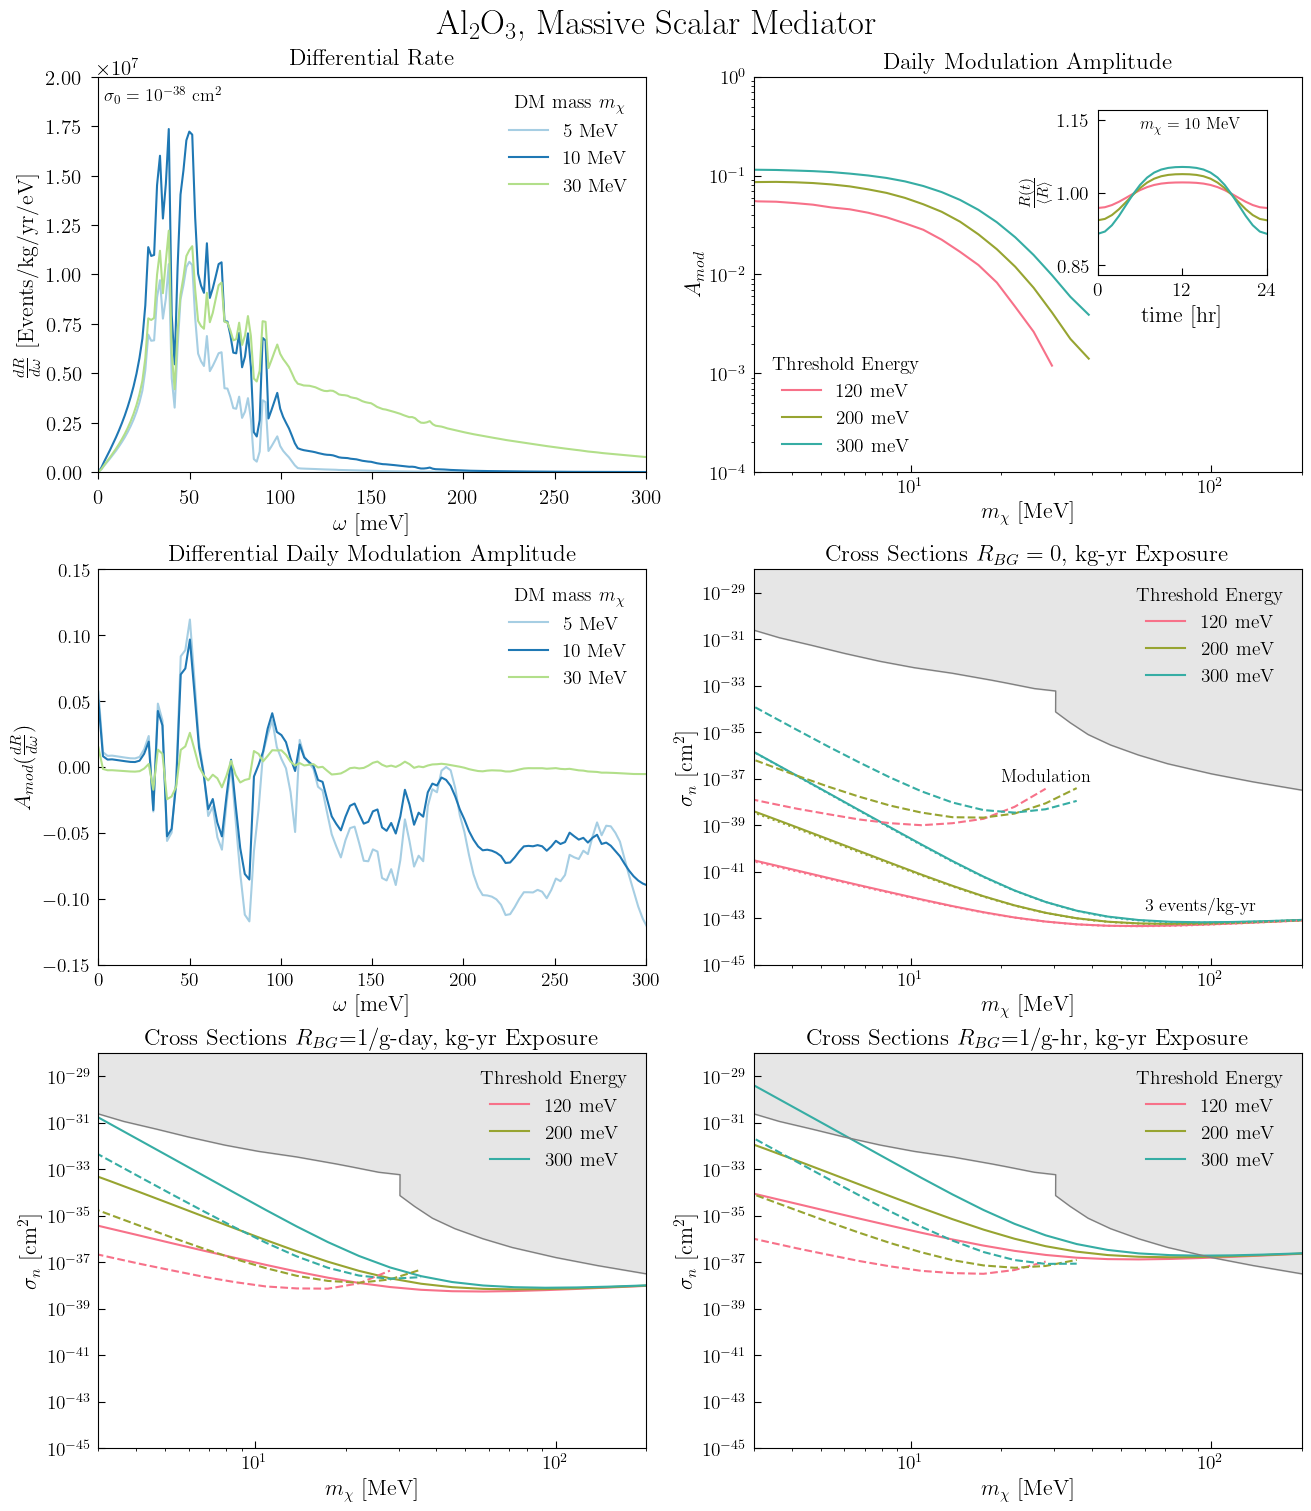

In [79]:
modulation_fraction_Al2O3_e_thresh_dR= np.loadtxt('data/daily_differential_A_mod_al2o3_massive_scalar.txt')
Al2O3_daily_rate_modulation= np.loadtxt('data/daily_mod_curve_al2o3_massive_scalar.txt').T

sigma_n_Al2O3 = np.loadtxt('data/sigma_n_al2o3_massive_scalar.txt').T
sigma_n_modulation_Al2O3 = np.loadtxt('data/sigma_n_mod_al2o3_massive_scalar.txt').T
sigma_n_Al2O3_iso =np.loadtxt('data/sigma_n_iso_al2o3_massive_scalar.txt').T
modulation_fraction_Al2O3_mass = np.loadtxt('data/R(0)_over_average_R_mass_Al2O3_massive_scalar.txt').T
constraints = np.loadtxt('data/heavy_mediator_constraints.txt').T

sigma_mod_g_day = np.loadtxt('data/sigma_mod_Rbg_gram_day_al2o3_massive_scalar.txt').T
sigma_mod_g_hr = np.loadtxt('data/sigma_mod_Rbg_gram_hr_al2o3_massive_scalar.txt').T

dR_domega_al2o3_massive_scalar = np.loadtxt('data/dR_domega_al2o3_massive_scalar.txt')
##################################################################################################
fig,ax = plt.subplots(3,2,figsize=(13,15),layout='constrained',)

mass_colors = sns.color_palette('Paired',3)
energy_colors = sns.color_palette('husl',4)

################################################################
#(0,0): dR/domega as a function of omega for a few masses

points = 250
DM_masses = np.array([5,10,30])*1e6
mass_labels = ['5 MeV', '10 MeV', '30 MeV']

for i,mass in enumerate(DM_masses):
    ax[0,0].plot(dR_domega_al2o3_massive_scalar[0]*1000,dR_domega_al2o3_massive_scalar[i+1],label=mass_labels[i],color=mass_colors[i])
ax[0,0].set_title(r'Differential Rate',y=1.01)
ax[0,0].legend(fontsize=14,frameon=False,ncol=1,title=r'DM mass $m_{\chi}$');
ax[0,0].set_xlabel(r'$\omega$ [meV]',fontsize=16)
ax[0,0].set_ylabel(r'$\frac{dR}{d\omega}$ [Events/kg/yr/eV]',fontsize=16)
ax[0,0].set_xlim(0,300)
ax[0,0].set_ylim(0,2e7);
ax[0,0].annotate(r'$\sigma_0 = 10^{-38}$ cm$^2$',(3,1.88e7),fontsize=13)


################################################################
#(1,0): A_mod(dR/domega) as a function of omega for a few masses

mass_DM_values = np.array([5e6, 10e6, 30e6])

omega = modulation_fraction_Al2O3_e_thresh_dR[0]
mass_labels = ['5 MeV', '10 MeV', '30 MeV']

ax[1,0].plot(omega*1000,modulation_fraction_Al2O3_e_thresh_dR[1] - np.tile(1,(len(modulation_fraction_Al2O3_e_thresh_dR[1]))),label=mass_labels[0],color=mass_colors[0])
ax[1,0].plot(omega*1000,modulation_fraction_Al2O3_e_thresh_dR[2] - np.tile(1,(len(modulation_fraction_Al2O3_e_thresh_dR[2]))),label=mass_labels[1],color=mass_colors[1])
ax[1,0].plot(omega*1000,modulation_fraction_Al2O3_e_thresh_dR[3] - np.tile(1,(len(modulation_fraction_Al2O3_e_thresh_dR[3]))),label=mass_labels[2],color=mass_colors[2])

ax[1,0].tick_params(axis="both",which="major",labelsize=14,direction="in",pad=5)
ax[1,0].legend(fontsize=14,frameon=False,ncol=1,title=r'DM mass $m_{\chi}$');
ax[1,0].set_xlim(0,300);
ax[1,0].set_ylim(-0.15,0.15)
ax[1,0].set_xlabel(r'$\omega$ [meV]',fontsize=16);
ax[1,0].set_ylabel(r'$A_{mod}(\frac{dR}{d \omega}$)',fontsize=16);
ax[1,0].set_title(r'Differential Daily Modulation Amplitude');

################################################################
#(0,1): A_mod as a function of mass

Energy_thresh = [120.e-3,200.e-3,500e-3,1]
Energy_thresh_labels = ['120 meV','200 meV','300 meV']

ax[0,1].plot(modulation_fraction_Al2O3_mass[0][:25]/1e6,modulation_fraction_Al2O3_mass[1][:25] ,label=Energy_thresh_labels[0],color=energy_colors[0])
ax[0,1].plot(modulation_fraction_Al2O3_mass[0][:27]/1e6,modulation_fraction_Al2O3_mass[2][:27] ,label=Energy_thresh_labels[1],color=energy_colors[1])
ax[0,1].plot(modulation_fraction_Al2O3_mass[0][:27]/1e6,modulation_fraction_Al2O3_mass[3][:27],label=Energy_thresh_labels[2],color=energy_colors[2])

ax[0,1].tick_params(axis="both",which="major",labelsize=14,direction="in",pad=5)
ax[0,1].legend(fontsize=14,frameon=False,ncol=1,title='Threshold Energy',loc='lower left');
ax[0,1].set_xlim(3,200);
ax[0,1].set_ylim(1e-4,1e0)
ax[0,1].set_xlabel(r'$m_{\chi}$ [MeV]',fontsize=16);
ax[0,1].set_ylabel(r'$A_{mod}$',fontsize=16);
ax[0,1].set_title(r'Daily Modulation Amplitude');
ax[0,1].set_xscale('log')
ax[0,1].set_yscale('log')

################################################################
# cross sections

Energy_thresh = [120.e-3,200.e-3,500e-3,1]
Energy_thresh_labels = ['120 meV','200 meV','300 meV','1 eV']

ax[1,1].plot(sigma_n_Al2O3[0]/1e6,sigma_n_Al2O3[1],label=Energy_thresh_labels[0],color=energy_colors[0])
ax[1,1].plot(sigma_n_Al2O3[0]/1e6,sigma_n_Al2O3[2],label=Energy_thresh_labels[1],color=energy_colors[1])
ax[1,1].plot(sigma_n_Al2O3[0]/1e6,sigma_n_Al2O3[3],label=Energy_thresh_labels[2],color=energy_colors[2])

ax[1,1].plot(sigma_n_Al2O3_iso[0]/1e6,sigma_n_Al2O3_iso[1],color=energy_colors[0],linestyle='dotted')
ax[1,1].plot(sigma_n_Al2O3_iso[0]/1e6,sigma_n_Al2O3_iso[2],color=energy_colors[1],linestyle='dotted')
ax[1,1].plot(sigma_n_Al2O3_iso[0]/1e6,sigma_n_Al2O3_iso[3],color=energy_colors[2],linestyle='dotted')

ax[1,1].plot(sigma_n_modulation_Al2O3[0][:15]/1e6,sigma_n_modulation_Al2O3[1][:15],color=energy_colors[0],linestyle='dashed')
ax[1,1].plot(sigma_n_modulation_Al2O3[0][:16]/1e6,sigma_n_modulation_Al2O3[2][:16],color=energy_colors[1],linestyle='dashed')
ax[1,1].plot(sigma_n_modulation_Al2O3[0][:16]/1e6,sigma_n_modulation_Al2O3[3][:16],color=energy_colors[2],linestyle='dashed')

ax[1,1].fill_between(constraints[0],constraints[1],1,color='gainsboro',alpha=0.7)
ax[1,1].plot(constraints[0],constraints[1],color='gray',linewidth=1)


ax[1,1].set_xscale('log');
ax[1,1].set_yscale('log');
ax[1,1].set_xlabel(r'$m_{\chi}$ [MeV]',fontsize=16);
ax[1,1].set_ylabel(r'$\sigma_n$ [cm$^2$]',fontsize=16);
ax[1,1].set_xlim(3.0e0,200);
ax[1,1].set_ylim(1e-45,1e-28)
ax[1,1].tick_params(axis="both",which="major",labelsize=14,direction="in",pad=5)
ax[1,1].legend(fontsize=14,frameon=False,ncol=1,title='Threshold Energy',loc='upper right');
ax[1,1].set_title(r'Cross Sections $R_{BG}=0$, kg-yr Exposure');

ax[1,1].annotate('3 events/kg-yr',(60,2e-43),fontsize=13)
ax[1,1].annotate('Modulation',(20,0.8e-37),fontsize=13)

################################################################

mass_DM_values = np.logspace(6,9,30)
ax[2,0].plot(sigma_n_Al2O3[0]/1e6,sigma_n_Al2O3[1]*1000*365/3,label=Energy_thresh_labels[0],color=energy_colors[0])
ax[2,0].plot(sigma_n_Al2O3[0]/1e6,sigma_n_Al2O3[2]*1000*365/3,label=Energy_thresh_labels[1],color=energy_colors[1])
ax[2,0].plot(sigma_n_Al2O3[0]/1e6,sigma_n_Al2O3[3]*1000*365/3,label=Energy_thresh_labels[2],color=energy_colors[2])


ax[2,0].plot(sigma_mod_g_day[0][:15]/1e6,sigma_mod_g_day[1][:15],color=energy_colors[0],linestyle='dashed')
ax[2,0].plot(sigma_mod_g_day[0][:16]/1e6,sigma_mod_g_day[2][:16],color=energy_colors[1],linestyle='dashed')
ax[2,0].plot(sigma_mod_g_day[0][:16]/1e6,sigma_mod_g_day[3][:16],color=energy_colors[2],linestyle='dashed')

ax[2,0].set_xscale('log');
ax[2,0].set_yscale('log');
ax[2,0].set_xlabel(r'$m_{\chi}$ [MeV]',fontsize=16);
ax[2,0].set_ylabel(r'$\sigma_n$ [cm$^2$]',fontsize=16);
ax[2,0].set_xlim(3.0e0,200);
ax[2,0].set_ylim(1e-45,1e-28)
ax[2,0].tick_params(axis="both",which="major",labelsize=14,direction="in",pad=5)
ax[2,0].legend(fontsize=14,frameon=False,ncol=1,title='Threshold Energy',loc='upper right');
ax[2,0].set_title(r'Cross Sections $R_{BG}$=1/g-day, kg-yr Exposure');

ax[2,0].fill_between(constraints[0],constraints[1],1,color='gainsboro',alpha=0.7)
ax[2,0].plot(constraints[0],constraints[1],color='gray',linewidth=1)

mass_DM_values = np.logspace(6,9,30)
ax[2,1].plot(sigma_n_Al2O3[0]/1e6,sigma_n_Al2O3[1]*1000*365*24/3,label=Energy_thresh_labels[0],color=energy_colors[0])
ax[2,1].plot(sigma_n_Al2O3[0]/1e6,sigma_n_Al2O3[2]*1000*365*24/3,label=Energy_thresh_labels[1],color=energy_colors[1])
ax[2,1].plot(sigma_n_Al2O3[0]/1e6,sigma_n_Al2O3[3]*1000*365*24/3,label=Energy_thresh_labels[2],color=energy_colors[2])


ax[2,1].plot(sigma_mod_g_hr[0][:15]/1e6,sigma_mod_g_hr[1][:15],color=energy_colors[0],linestyle='dashed')
ax[2,1].plot(sigma_mod_g_hr[0][:16]/1e6,sigma_mod_g_hr[2][:16],color=energy_colors[1],linestyle='dashed')
ax[2,1].plot(sigma_mod_g_hr[0][:16]/1e6,sigma_mod_g_hr[3][:16],color=energy_colors[2],linestyle='dashed')

ax[2,1].set_xscale('log');
ax[2,1].set_yscale('log');
ax[2,1].set_xlabel(r'$m_{\chi}$ [MeV]',fontsize=16);
ax[2,1].set_ylabel(r'$\sigma_n$ [cm$^2$]',fontsize=16);
ax[2,1].set_xlim(3.0e0,200);
ax[2,1].set_ylim(1e-45,1e-28)
ax[2,1].tick_params(axis="both",which="major",labelsize=14,direction="in",pad=5)
ax[2,1].legend(fontsize=14,frameon=False,ncol=1,title='Threshold Energy',loc='upper right');
ax[2,1].set_title(r'Cross Sections $R_{BG}$=1/g-hr, kg-yr Exposure');
ax[2,1].fill_between(constraints[0],constraints[1],1,color='gainsboro',alpha=0.7)
ax[2,1].plot(constraints[0],constraints[1],color='gray',linewidth=1)


################################################################
# Inset Daily modulation curve

left, bottom, width, height = [0.84, 0.82, 0.13, 0.11]
ax = fig.add_axes([left, bottom, width, height])

time_array = Al2O3_daily_rate_modulation[0]

for j in range(3):
    ax.plot(time_array,Al2O3_daily_rate_modulation[j+1],color=energy_colors[j],label=f' {Energy_thresh_labels[j]}');

ax.set_xlim(0,24)
ax.annotate(r'$m_{\chi} = 10$ MeV',(6,1.13),fontsize=12)
ax.set_xlabel('time [hr]',fontsize=16)
ax.set_xticks([0,12,24])
ax.set_yticks([0.85,1,1.15])
ax.set_ylabel(f'$\\frac{{R(t)}}{{\\left< R \\right>}}$',fontsize=16);
ax.set_ylim(0.83,1.17);
ax.tick_params(axis="both",which="major",labelsize=14,direction="in",pad=5)

fig.suptitle(r'Al$_2$O$_3$, Massive Scalar Mediator',fontsize=25);

#fig.savefig('Al2O3_massive_scalar.pdf')